

```
 BƯỚC 1: IMPORT THƯ VIỆN


```



In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình


BƯỚC 2: Đọc dữ liệu





In [ ]:
#tạo quyền truy cập với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/Dữ liệu Lịch sử VNM (2).csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày   Đóng cửa     Mở cửa   Cao nhất  Thấp nhất
0       8/5/2025  57,400.00  57,200.00  57,800.00  57,200.00
1       7/5/2025  57,200.00  56,900.00  57,700.00  56,900.00
2       6/5/2025  56,900.00  57,000.00  57,400.00  56,900.00
3       5/5/2025  56,900.00  57,500.00  57,600.00  56,900.00
4     29/04/2025  57,600.00  57,500.00  57,900.00  57,200.00
...          ...        ...        ...        ...        ...
2945  16/07/2013  96,528.00  95,139.00  97,222.00  95,139.00
2946  15/07/2013  95,139.00  95,139.00  95,833.00  94,444.00
2947   12/7/2013  95,139.00  94,444.00  95,139.00  93,750.00
2948   11/7/2013  94,444.00  94,444.00  95,139.00  93,750.00
2949   10/7/2013  94,444.00  95,139.00  95,833.00  94,444.00

[2950 rows x 5 columns]



BƯỚC 3: MÔ TẢ DỮ LIỆU





In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(2950, 5)

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2025-05-08,"57,400.00","57,200.00","57,800.00","57,200.00"
1,2025-05-07,"57,200.00","56,900.00","57,700.00","56,900.00"
2,2025-05-06,"56,900.00","57,000.00","57,400.00","56,900.00"
3,2025-05-05,"56,900.00","57,500.00","57,600.00","56,900.00"
4,2025-04-29,"57,600.00","57,500.00","57,900.00","57,200.00"


In [ ]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2950 non-null   datetime64[ns]
 1   Đóng cửa   2950 non-null   object        
 2   Mở cửa     2950 non-null   object        
 3   Cao nhất   2950 non-null   object        
 4   Thấp nhất  2950 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 115.4+ KB


In [ ]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2950
mean,2019-06-07 23:16:33.355932160
min,2013-07-10 00:00:00
25%,2016-06-28 06:00:00
50%,2019-06-12 12:00:00
75%,2022-05-23 18:00:00
max,2025-05-08 00:00:00


BƯỚC 4: TIỀN XỬ LÍ DỮ LIỆU

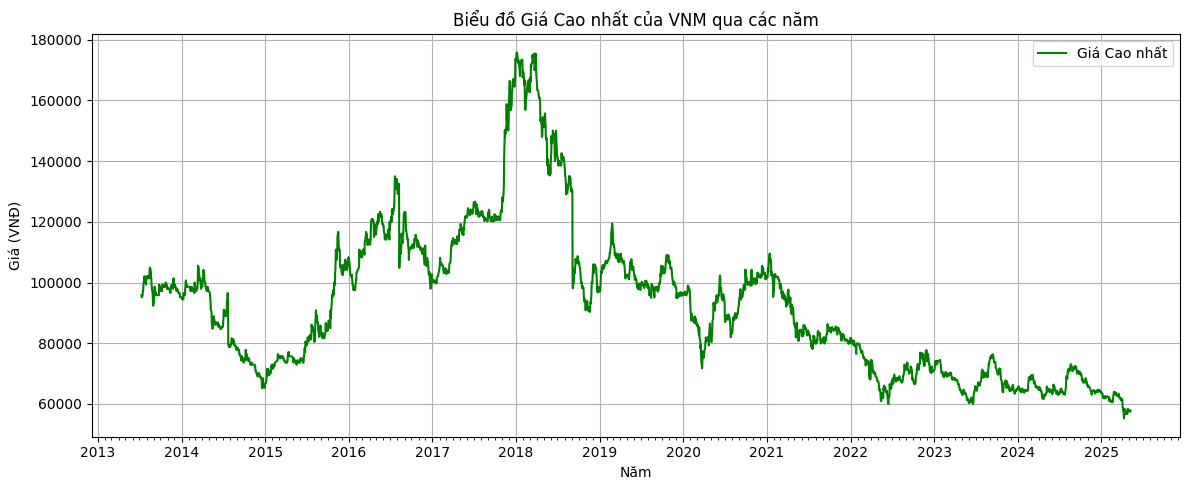

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển đổi cột "Ngày" sang datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df = df.sort_values(by='Ngày')

# Kiểm tra và chuyển đổi cột "Cao nhất" nếu cần
if df['Cao nhất'].dtype == 'object':
    df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)

# Vẽ biểu đồ Giá Cao nhất
plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Cao nhất'], label='Giá Cao nhất', color='green')
plt.xlabel('Năm')
plt.ylabel('Giá (VNĐ)')
plt.title('Biểu đồ Giá Cao nhất của VNM qua các năm')
plt.legend()
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)
plt.grid()
plt.tight_layout()
plt.show()




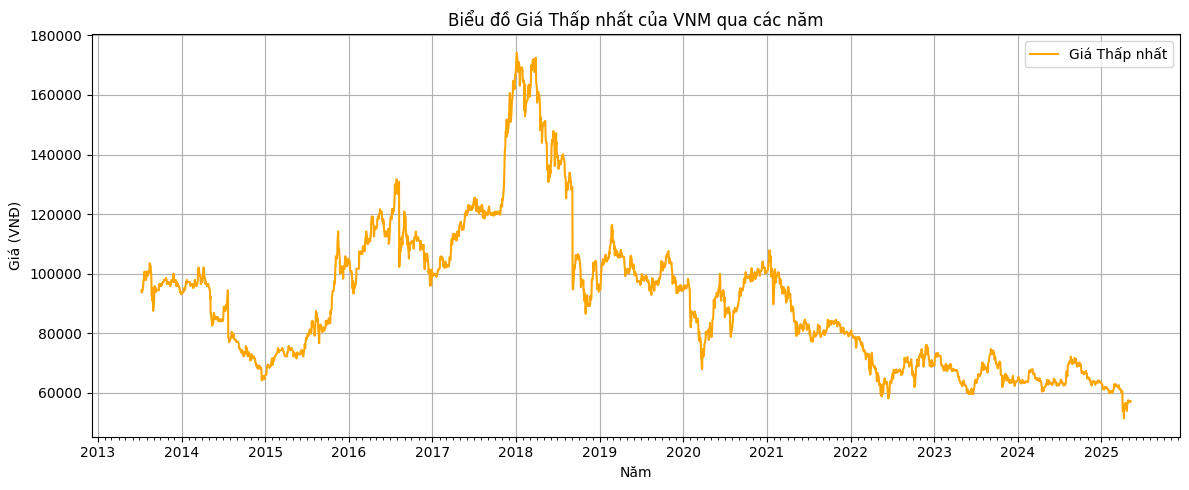

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển cột "Ngày" sang datetime và sắp xếp
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df = df.sort_values(by='Ngày')

# Kiểm tra và chuyển đổi cột "Thấp nhất" nếu cần
if df['Thấp nhất'].dtype == 'object':
    df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Vẽ biểu đồ Giá Thấp nhất
plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Thấp nhất'], label='Giá Thấp nhất', color='orange')
plt.xlabel('Năm')
plt.ylabel('Giá (VNĐ)')
plt.title('Biểu đồ Giá Thấp nhất của VNM qua các năm')
plt.legend()

# Định dạng trục X: năm–tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.grid()
plt.tight_layout()
plt.show()




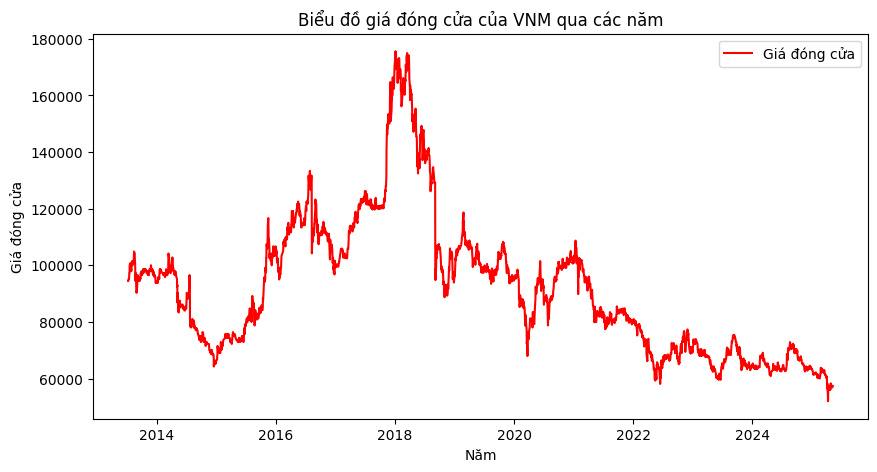

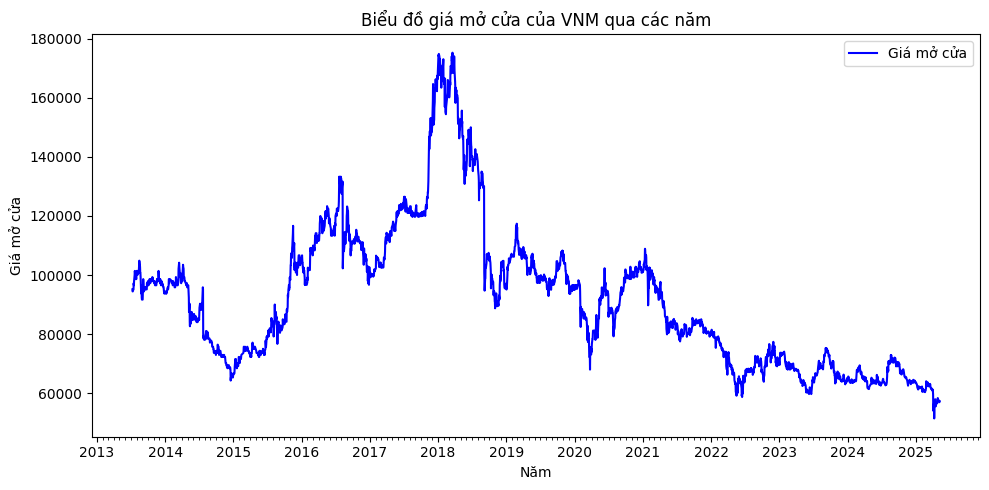

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Tạo đồ thị giá mở cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Mở cửa'], label='Giá mở cửa', color='blue')
plt.xlabel('Năm')
plt.ylabel('Giá mở cửa')
plt.title('Biểu đồ giá mở cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2025-04-29,57600.0
2025-05-05,56900.0
2025-05-06,56900.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]


In [ ]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [56900.],
       [57200.],
       [57400.]])

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train
y_train

[np.float64(0.3490831701435531),
 np.float64(0.3546990564663613),
 np.float64(0.3490831701435531),
 np.float64(0.3546990564663613),
 np.float64(0.365938921167198),
 np.float64(0.3603230348443898),
 np.float64(0.365938921167198),
 np.float64(0.37156289954522653),
 np.float64(0.3603230348443898),
 np.float64(0.365938921167198),
 np.float64(0.3603230348443898),
 np.float64(0.365938921167198),
 np.float64(0.365938921167198),
 np.float64(0.365938921167198),
 np.float64(0.3771787858680348),
 np.float64(0.365938921167198),
 np.float64(0.365938921167198),
 np.float64(0.37156289954522653),
 np.float64(0.3771787858680348),
 np.float64(0.3771787858680348),
 np.float64(0.37156289954522653),
 np.float64(0.3771787858680348),
 np.float64(0.3771787858680348),
 np.float64(0.37156289954522653),
 np.float64(0.37156289954522653),
 np.float64(0.3771787858680348),
 np.float64(0.3771787858680348),
 np.float64(0.37156289954522653),
 np.float64(0.37156289954522653),
 np.float64(0.37156289954522653),
 np.float6

In [ ]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))



BƯỚC 5: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH



In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#huấn luyện mô hình
save_model = "/content/drive/MyDrive/dataset/save_model1.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/content/drive/MyDrive/dataset/save_model1.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


BƯỚC 6: TÁI SỬ DỤNG MÔ HÌNH



In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


THỬ ĐỘ CHÍNH XÁC



<ipython-input-96-4f5867c1eb90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-96-4f5867c1eb90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


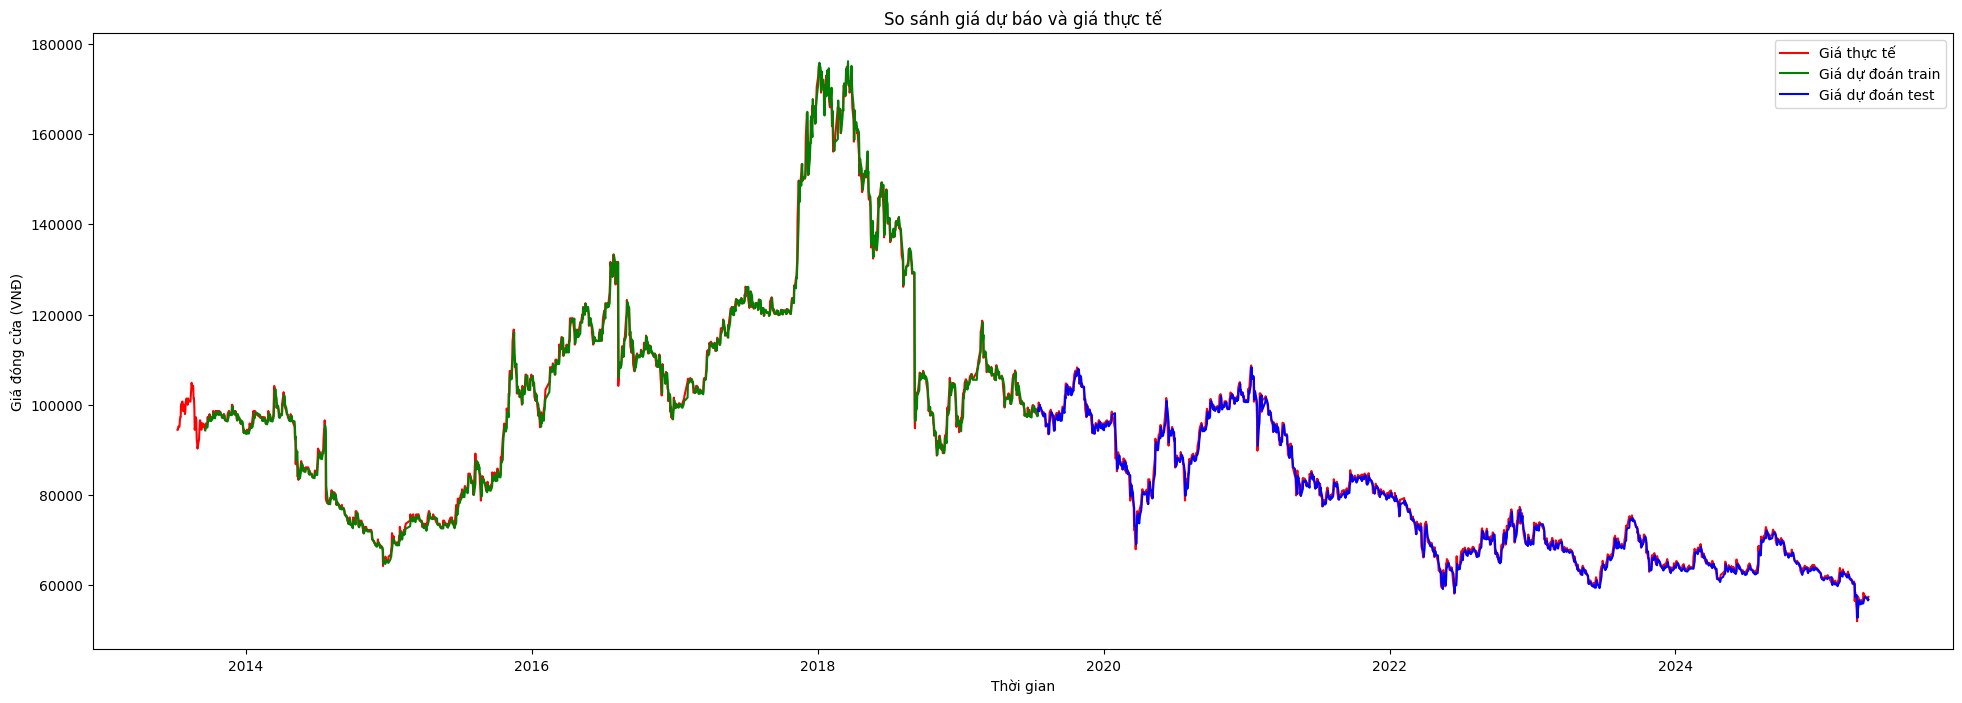

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9931588181049984
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1165.1102128232758
Phần trăm sai số tuyệt đối trung bình tập train: 0.01077094660780077


In [ ]:
train_data1

,Đóng cửa,Dự đoán
Ngày,,
2013-09-19,95139.0,94307.335938
2013-09-20,95833.0,94805.140625
2013-09-23,95139.0,95468.281250
2013-09-24,95833.0,94945.546875
2013-09-25,97222.0,95472.156250
...,...,...
2019-07-11,99133.0,98779.507812
2019-07-12,98183.0,98876.109375
2019-07-15,97549.0,98072.429688


In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9919827611614979
Sai số tuyệt đối trung bình trên tập test (VNĐ): 849.1698997844826
Phần trăm sai số tuyệt đối trung bình tập test: 0.01102218053607613


In [ ]:
test_data1

,Đóng cửa,Dự đoán
Ngày,,
2019-07-18,98658.0,98921.609375
2019-07-19,100479.0,98465.007812
2019-07-22,99371.0,99999.781250
2019-07-23,99291.0,99247.671875
2019-07-24,99450.0,99071.867188
...,...,...
2025-04-29,57600.0,57287.222656
2025-05-05,56900.0,57237.320312
2025-05-06,56900.0,56773.093750


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


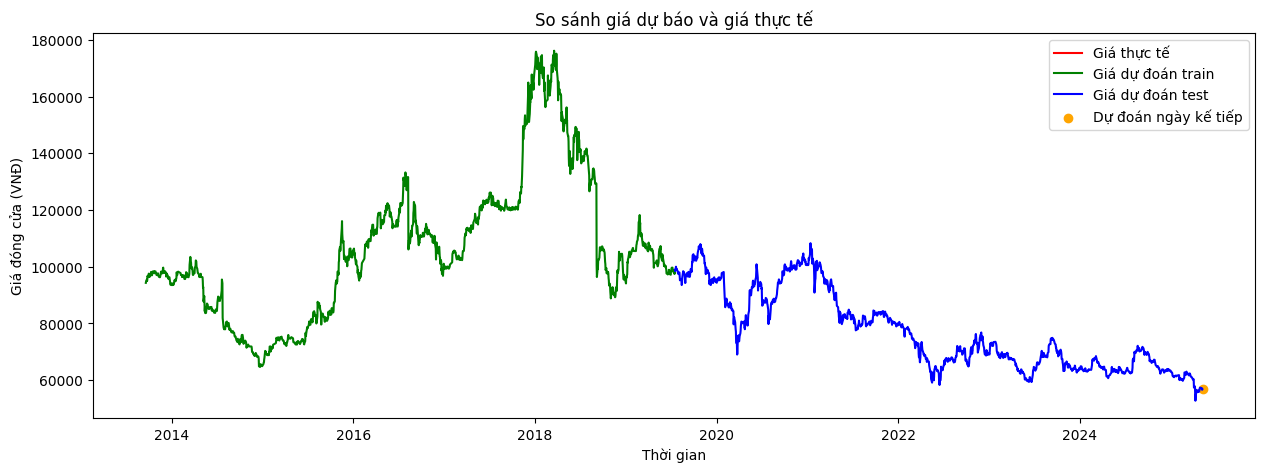

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)


        Ngày   Giá dự đoán  Giá ngày trước
0 2025-05-09  56990.480469         57400.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

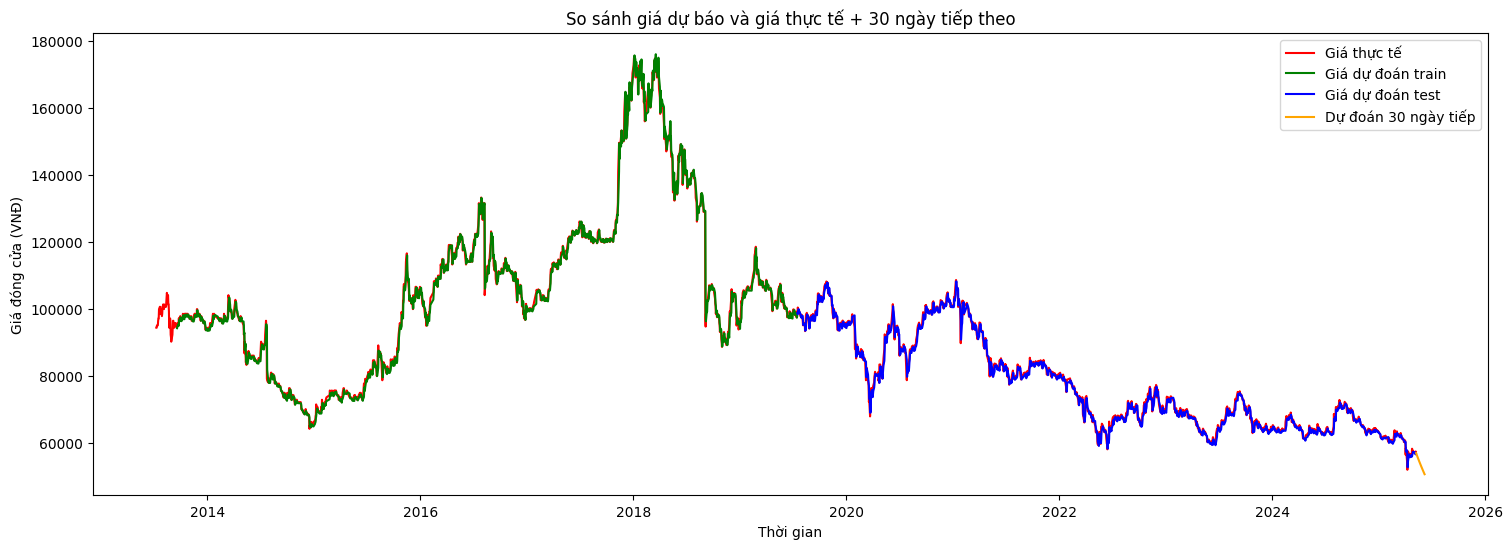

In [ ]:
# Số ngày cần dự đoán tiếp
days_to_predict = 30

# Danh sách lưu kết quả dự đoán
predicted_dates = []
predicted_prices = []

# Ngày bắt đầu
next_date = df['Ngày'].iloc[-1]

# Chuỗi 50 giá đóng cửa gần nhất (đã chuẩn hóa)
last_50_prices = sc.transform(df['Đóng cửa'].values[-50:].reshape(-1, 1))

for _ in range(days_to_predict):
    # Dự đoán
    x_next = np.array([last_50_prices[:, 0]])  # shape (1, 50)
    x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
    y_next_predict = final_model.predict(x_next)

    # Đưa giá trị dự đoán về dạng thực
    y_next_predict_real = sc.inverse_transform(y_next_predict)

    # Tăng ngày
    next_date += pd.Timedelta(days=1)

    # Lưu kết quả
    predicted_dates.append(next_date)
    predicted_prices.append(y_next_predict_real[0][0])

    # Thêm giá trị dự đoán vào chuỗi 50 giá đóng cửa
    last_50_prices = np.append(last_50_prices, sc.transform(y_next_predict_real).reshape(1,1), axis=0)
    last_50_prices = last_50_prices[1:]  # giữ lại 50 giá trị gần nhất

# Tạo DataFrame dự đoán tháng tới
df_next_month = pd.DataFrame({'Ngày': predicted_dates, 'Dự đoán': predicted_prices})

# Vẽ biểu đồ
plt.figure(figsize=(18, 6))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.plot(df_next_month['Ngày'], df_next_month['Dự đoán'], label='Dự đoán 30 ngày tiếp', color='orange')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế + 30 ngày tiếp theo')
plt.legend()
plt.show()


In [ ]:
# Số ngày muốn dự đoán
num_days_to_predict = 30

# Chuỗi 50 giá đóng cửa gần nhất (giá đã chuẩn hóa)
last_50_prices = sc_train[-50:, 0]  # đã chuẩn hóa

# List để lưu kết quả dự đoán
predicted_prices = []

# Ngày bắt đầu dự đoán (ngày kế tiếp)
current_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Dự đoán từng ngày
for i in range(num_days_to_predict):
    # Tạo input cho model: reshape về (1, 50, 1)
    x_input = np.array([last_50_prices])
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

    # Dự đoán giá tiếp theo
    y_pred = final_model.predict(x_input)

    # Giải chuẩn hóa giá dự đoán
    y_pred_actual = sc.inverse_transform(y_pred)

    # Lưu giá và ngày
    predicted_prices.append({'Ngày': current_date, 'Giá dự đoán': y_pred_actual[0][0]})

    # Cập nhật lại chuỗi giá: bỏ giá cũ nhất, thêm giá mới vào cuối
    last_50_prices = np.append(last_50_prices[1:], sc.transform(y_pred_actual)[0][0])

    # Tăng ngày tiếp theo
    current_date += pd.Timedelta(days=1)

# Chuyển list kết quả thành DataFrame
forecast_df = pd.DataFrame(predicted_prices)

# Xem kết quả
print(forecast_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━